# Week 6 Pre-Lecture Notebook

In [29]:
# Please keep it here and run it every time you reset the kernel
LINK_FUEL_EFFICIENCY_CLEAN = 'https://www.dropbox.com/s/dct18y8ciwqpcom/CLEAN_Fule_Efficiency_Car_Dataset_2023%20.xlsx?raw=1'
LINK_ITEMS = 'https://www.dropbox.com/s/m6iggs4bl76ie4o/items.csv?raw=1'
LINK_RESTAURANTS = 'https://www.dropbox.com/s/fj9bxnzhcnsl9oo/restaurants.csv?raw=1'
LINK_ORDERS = 'https://www.dropbox.com/s/fckortfcnqdkisk/orders.csv?raw=1'
LINK_CENSUS_SHORT = 'https://www.dropbox.com/s/z81z1c60im4a8he/census.csv?raw=1'
LINK_WEAPON_MARKET_SHARE = 'https://www.dropbox.com/s/2o2o3rrxhrbytt2/weapon_export_market_share.csv?raw=1'
LINK_SEATTLE_WEATHER = 'https://www.dropbox.com/s/nhxeq28k74i0yox/Seattle_Weather.xlsx?raw=1'
LINK_GDP_COUNTRIES = 'https://www.dropbox.com/s/ymud5qaislamlgq/countries_gdp.csv?raw=1'
LINK_BOX_1 = 'https://www.dropbox.com/s/b5gt5rxe368o9iw/box_1_data.csv?raw=1'
LINK_BOX_2 = 'https://www.dropbox.com/s/mzjlz17b51aoj7d/box_2_data.csv?raw=1'
LINK_BOX_3 = 'https://www.dropbox.com/s/oy6jomn8bp8q1yy/box_3_data.csv?raw=1'


In [31]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt

student_data = {
    'Student_ID': [1.0, 2.0, 3.0, 4.0, None, 6.0, None, 8.0, 9.0, 10.0, 
                   11.0, None, 13.0, 14.0, 15.0, 16.0, None, 18.0, 19.0, 20.0, 2.0],
    'Name': ['Alice', 'Bob', 'Charlie', None, None, 'Frank', None, 'Hannah', 'Ian', None, 
             'Kelly', None, None, 'Nina', 'Owen', 'Paul', None, 'Rita', 'Sam', None, 'Bob'],
    'Medical_History': [None] * 21,  # Fully missing column
    'Age': [20.0, None, 23.0, 21.0, None, 24.0, None, 22.0, 23.0, None, 
            21.0, None, 24.0, 23.0, None, 23.0, 22.0, None, None, 21.0, None],
    'Score': [88.0, 92.0, None, 90.0, None, 93.0, None, 89.0, None, 85.0, 
              None, None, None, 88.0, 87.0, None, 89.0, 84.0, 93.0, None, 92.0]
}


df_student = pd.DataFrame(student_data)


my_labels = ['a', 'b', 'c', 'd', 'e']
nums_0 = [650, 500, 300, 150, 20]
nums_1 = [200, 210, 220, 225, 240]
nums_2 = [210, 180, 225, 200, 200]
nums_3 = [240, 230, 220, 210, 200]
my_colors = ['gold', 'g', 'tab:purple', 'tab:blue', 'midnightblue']

df_orders = pd.read_csv(LINK_ORDERS)
df_car_clean = pd.read_excel(LINK_FUEL_EFFICIENCY_CLEAN)
df_census = pd.read_csv(LINK_CENSUS_SHORT)
df_weapon_mkt_share = pd.read_csv(LINK_WEAPON_MARKET_SHARE, index_col=0)
df_seattle_weather = pd.read_excel(LINK_SEATTLE_WEATHER, index_col=0)
df_gdp = pd.read_csv(LINK_GDP_COUNTRIES)
df_US_gdp = df_gdp[df_gdp.COUNTRY_NAME.eq('United States')]
df_CHINA_gdp = df_gdp[df_gdp.COUNTRY_NAME.eq('China')]
df_box_1 = pd.read_csv(LINK_BOX_1)
df_box_2 = pd.read_csv(LINK_BOX_2)
df_box_3 = pd.read_csv(LINK_BOX_3)


# Warm-up questions
## Q1: Find the minimum, average, and maximum number of drinks for each restaurant. Then, plot it.

**Hint**: in `df_orders` dataframe, use `groupby` on `RESTAURANT_ID`, and then access `DRINKS` columns. 

## Q2: Find the minimum, average, and maximum number of drinks for each restaurant and each order type.

**Hint**: in `df_orders` dataframe, use `pivot_table` on `RESTAURANT_ID` and `TYPE`. 


In [33]:
df_orders.RESTAURANT_ID.unique()

array(['R11', 'R16', 'R12', 'R17', 'R18', 'R15', 'R14', 'R13'],
      dtype=object)

In [34]:
#1
df_orders.groupby(by = 'RESTAURANT_ID').DRINKS.mean()

RESTAURANT_ID
R11   0.171
R12   0.322
R13   0.253
R14   0.196
R15   0.248
R16   0.296
R17   0.246
R18   0.245
Name: DRINKS, dtype: float64

In [35]:
df_orders.groupby(by = 'RESTAURANT_ID').DRINKS.agg(['min','max','mean'])

,min,max,mean
RESTAURANT_ID,,,
R11,0.000,3.000,0.171
R12,0.000,3.000,0.322
R13,0.000,3.000,0.253
R14,0.000,3.000,0.196
R15,0.000,3.000,0.248
R16,0.000,3.000,0.296
R17,0.000,3.000,0.246
R18,0.000,3.000,0.245


# EXAM

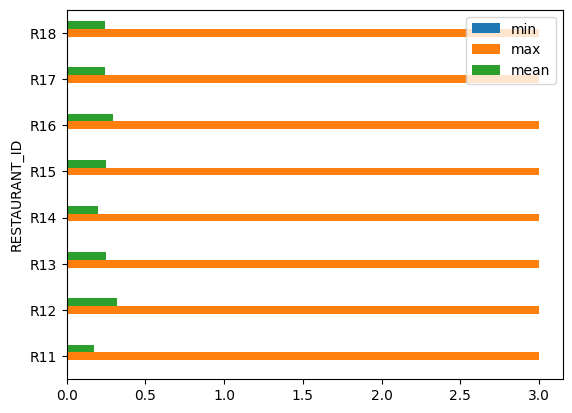

In [37]:
df_orders.groupby(by = 'RESTAURANT_ID').DRINKS.agg(['min','max','mean']).plot(kind = 'barh');

In [38]:
df_orders

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O15582182,2018-12-07 19:17:45,R11,PICKUP,2.000,2.000,NaN,NaN,NaN,NaN
1,O8958789,2018-07-14 21:23:43,R16,IN_STORE,0.000,0.000,NaN,NaN,NaN,NaN
2,O4829699,2018-04-12 13:14:42,R12,PICKUP,0.000,2.000,I1,I7,I11,I8
3,O10485041,2018-08-21 18:14:23,R17,IN_STORE,1.000,0.000,I1,I5,I10,I9
4,O10103121,2018-08-12 18:04:44,R16,DELIVERY,0.000,0.000,I1,I6,I10,I11
...,...,...,...,...,...,...,...,...,...,...
2392361,O13684398,2018-10-30 16:50:33,R16,IN_STORE,0.000,0.000,I1,I5,I12,I8
2392362,O8687364,2018-07-08 10:47:37,R11,IN_STORE,0.000,1.000,I1,I5,I11,I11
2392363,O196210,2018-01-05 17:07:01,R15,IN_STORE,0.000,0.000,I1,I6,I10,I10
2392364,O1945083,2018-02-12 11:18:33,R15,IN_STORE,3.000,0.000,I0,I7,I10,I9


In [39]:
df_test = df_orders.pivot_table(index = 'RESTAURANT_ID',
                     columns='TYPE',
                     values = 'DRINKS',
                      aggfunc = ['min','max','mean'])

In [40]:
df_test

min                      max                     mean  \
TYPE          DELIVERY IN_STORE PICKUP DELIVERY IN_STORE PICKUP DELIVERY   
RESTAURANT_ID                                                              
R11              0.000    0.000  0.000    3.000    3.000  3.000    0.172   
R12              0.000    0.000  0.000    3.000    3.000  3.000    0.360   
R13              0.000    0.000  0.000    3.000    3.000  3.000    0.284   
R14              0.000    0.000  0.000    3.000    3.000  3.000    0.192   
R15              0.000    0.000  0.000    3.000    3.000  3.000    0.248   
R16              0.000    0.000  0.000    3.000    3.000  3.000    0.295   
R17              0.000    0.000  0.000    3.000    3.000  3.000    0.248   
R18              0.000    0.000  0.000    3.000    3.000  3.000    0.243   

                               
TYPE          IN_STORE PICKUP  
RESTAURANT_ID                  
R11              0.171  0.170  
R12              0.319  0.321  
R13              0.250  0.251  
R14              0.196  0.197  
R15              0.248  0.246  
R16              0.296  0.294  
R17              0.245  0.247  
R18              0.244  0.248

In [41]:
df_test.index

Index(['R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18'], dtype='object', name='RESTAURANT_ID')

In [42]:
df_test.columns

MultiIndex([( 'min', 'DELIVERY'),
            ( 'min', 'IN_STORE'),
            ( 'min',   'PICKUP'),
            ( 'max', 'DELIVERY'),
            ( 'max', 'IN_STORE'),
            ( 'max',   'PICKUP'),
            ('mean', 'DELIVERY'),
            ('mean', 'IN_STORE'),
            ('mean',   'PICKUP')],
           names=[None, 'TYPE'])

In [43]:
# Check concept of multi-index from handout

# Basics of dataviz in python
# There are 3 different types of visualization libraries in python
## fundamental libraries such as `matplotlib`, `seaborn`, `pandas` 
## interactiove visualization libraries such as `plotly`
## map visualization libraries such as `folium` and `plotly`

# `matplotlib` library very basixs
## Two approaches for visualization:
## 1. functional approach. In this approach we call `plt` on everything

Text(0.5, 0, 'Numbers 1')

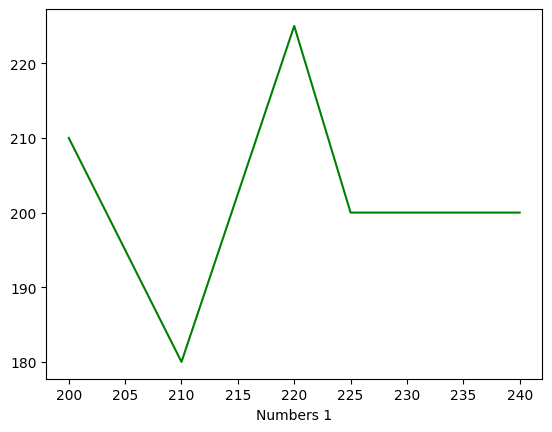

In [47]:
import matplotlib.pyplot as plt
plt.plot(nums_1,nums_2, color = 'green')
plt.xlabel('Numbers 1')
#plt.ylabel('Number 2')
#plt.title('Graph 1')

## Approach 2: Object_Oriented (OO) approach. 

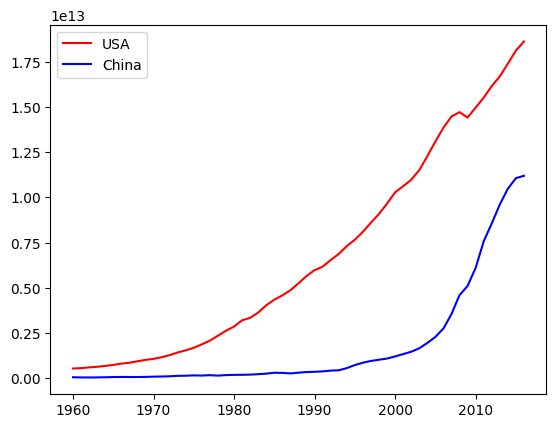

In [49]:
# OO approach to visualization in matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df_US_gdp.YEAR, df_US_gdp.GDP_VALUE,
       color = 'red',
       label = 'USA')
ax.plot(df_CHINA_gdp.YEAR, df_CHINA_gdp.GDP_VALUE,
       color = 'blue',
       label = 'China')
ax.legend()

## create more than 1 ax in one fig

In [110]:
df_seattle_weather

,TEMP_MAX_C,TEMP_MIN_C,WIND_METERS_PER_SEC,PERCIPITATION_MM,WEATHER
DATE,,,,,
2019-01-01,12.800,5.000,4.700,0.000,drizzle
2019-01-02,10.600,2.800,4.500,10.900,rain
2019-01-03,11.700,7.200,2.300,0.800,rain
2019-01-04,12.200,5.600,4.700,20.300,rain
2019-01-05,8.900,2.800,6.100,1.300,rain
...,...,...,...,...,...
2022-12-27,4.400,1.700,2.900,8.600,rain
2022-12-28,5.000,1.700,1.300,1.500,rain
2022-12-29,7.200,0.600,2.600,0.000,fog


In [112]:
# how many different values in column of weather
df_seattle_weather.WEATHER.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [114]:
df_seattle_weather.WEATHER.nunique()

5

In [116]:
df_seattle_weather.WEATHER.value_counts()

WEATHER
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<BarContainer object of 5 artists>

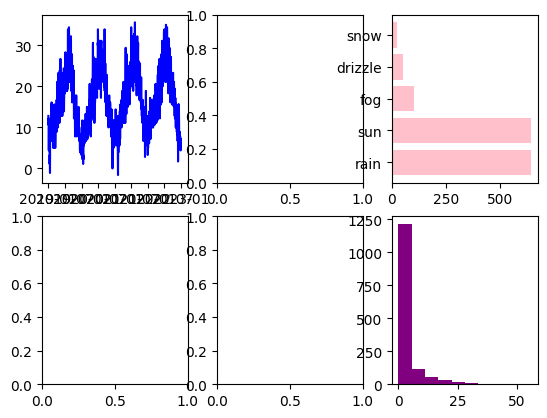

In [128]:
fig, ax = plt.subplots(nrows = 2, ncols=3)
# 1 figure, 6 ax

ax[0,0].plot(df_seattle_weather.TEMP_MAX_C, color = 'blue')
ax[1,2].hist(df_seattle_weather.PERCIPITATION_MM, color = 'purple')
ax[0,2].barh(df_seattle_weather.WEATHER.value_counts().index,
             df_seattle_weather.WEATHER.value_counts(),
             color = 'pink')

# Customization of plots in matplotlib
# most common ones:
# 2 ways to customize in `matplotlib`:
## 1. use `set_parameter(parameter_value)`
## 2. use `set(parameter = parameter_value)`

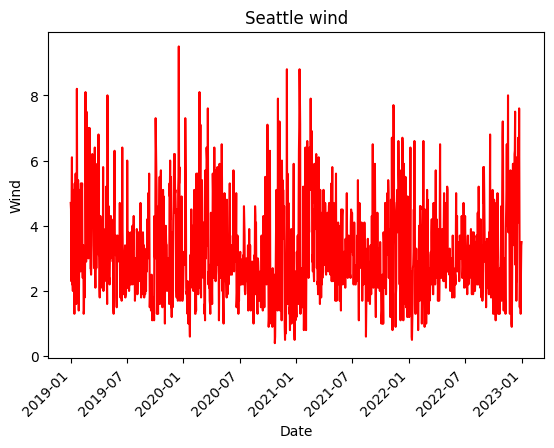

In [163]:
fig, ax = plt.subplots()
ax.plot(df_seattle_weather.WIND_METERS_PER_SEC, 
       color = 'red')
ax.set_xlabel('Date')
ax.set_ylabel('Wind')
ax.set_title('Seattle wind')
fig.autofmt_xdate(rotation=45)

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Wind'), Text(0.5, 1.0, 'Seattle Wind')]

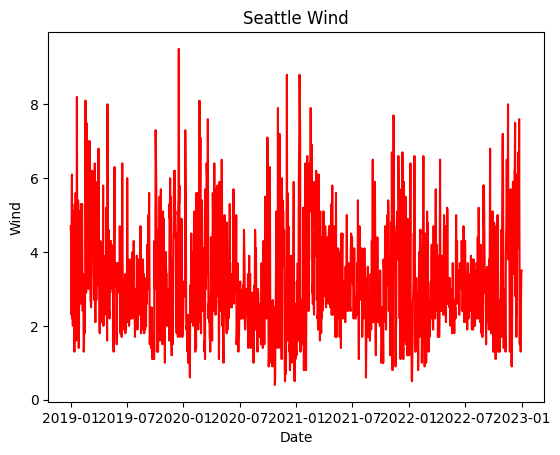

In [145]:
fig, ax = plt.subplots()
ax.plot(df_seattle_weather.WIND_METERS_PER_SEC, 
       color = 'red')
ax.set(xlabel = 'Date', 
       ylabel = 'Wind', 
       title = 'Seattle Wind')

[Text(0.5, 0, 'Date')]

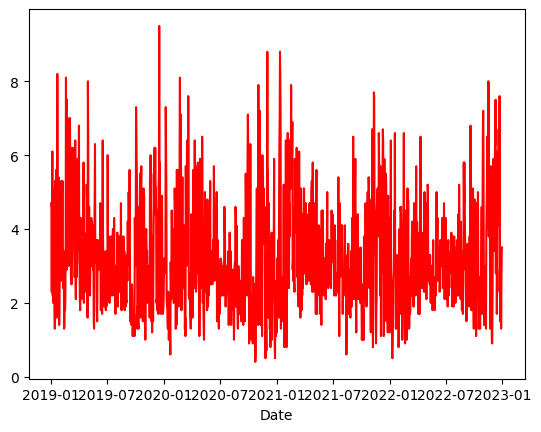

In [149]:
fig, ax = plt.subplots()
ax.plot(df_seattle_weather.WIND_METERS_PER_SEC, 
       color = 'red')
ax.set(xlabel = 'Date') # parameter can be seperated

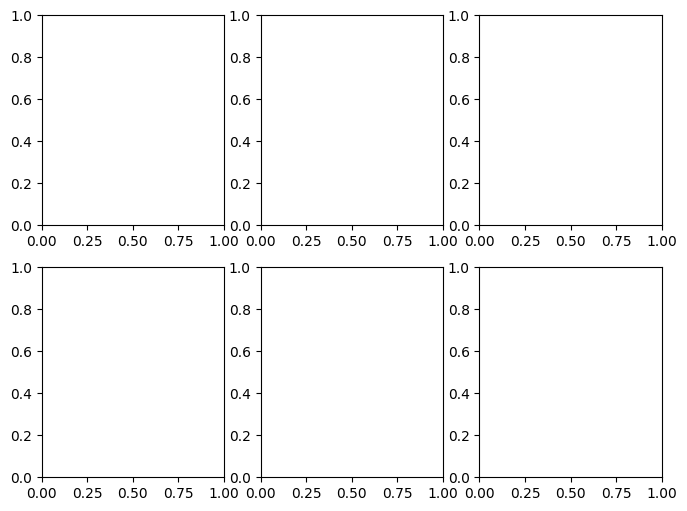

In [153]:
# fig size customization
# recommendation is to set the fig size when define it
# using subplots
fig, ax = plt.subplots(2,3, figsize = (8,6))


[Text(0.5, 1.0, 'Wind Speed')]

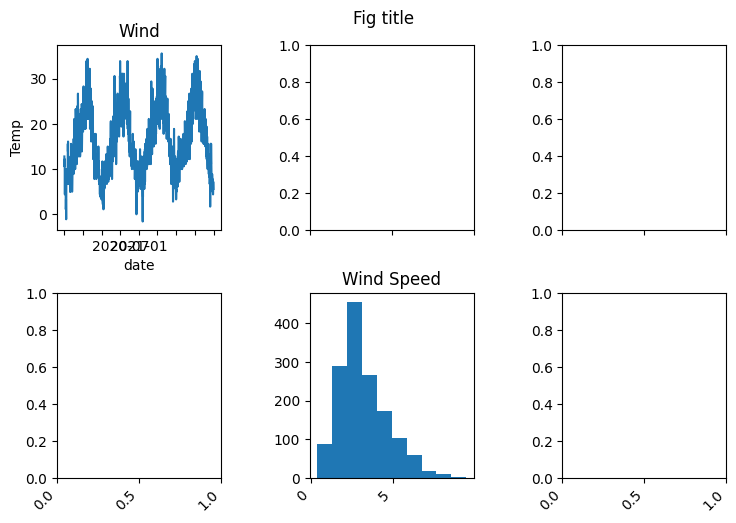

In [287]:
# text customization
# most common ones:
fig, ax = plt.subplots(2,3, figsize = (8,6))
# a common setting for better readability
fig.tight_layout(pad=3)  # avoid text overlap
# it has optional argument of pad, can be set to number bigger than 1 for more readability

fig.autofmt_xdate(rotation=45)  # this make sure there is not much text overlap in any of x-axis and y-axis of different ax

# add text to fig title
fig.suptitle('Fig title')

# plot temp max in [0,0], hist of wind in [1,1]
ax[0,0].plot(df_seattle_weather.TEMP_MAX_C)
ax[0,0].set(title = 'Wind',
           xlabel = 'date',
           ylabel = 'Temp')
ax[1,1].hist(df_seattle_weather.WIND_METERS_PER_SEC)
ax[1,1].set(title = 'Wind Speed')

# color customization
# 3 types:
## 1. customization of lines bars, etc.  `color = color_you_like`
## 2. cust of fig background   `fig.set_facecolor(color_name)`
## 3. cust of ax background   `ax.set_facecolor(color_name)`

(array([ 87., 289., 456., 265., 172., 102.,  60.,  18.,   9.,   3.]),
 array([0.4 , 1.31, 2.22, 3.13, 4.04, 4.95, 5.86, 6.77, 7.68, 8.59, 9.5 ]),
 <BarContainer object of 10 artists>)

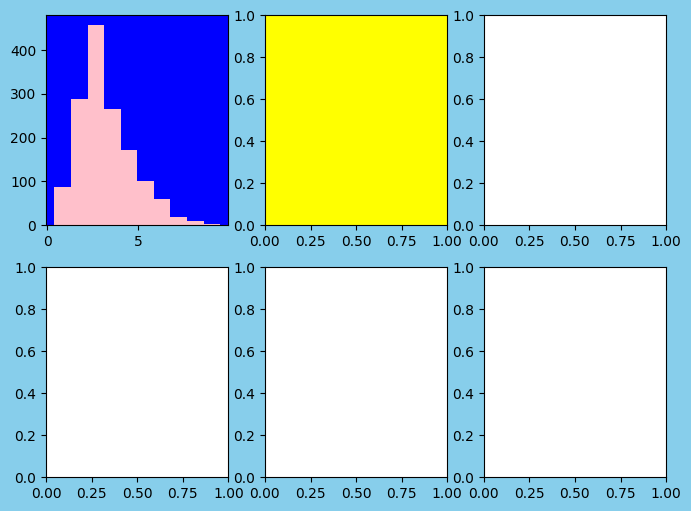

In [192]:
fig, ax = plt.subplots(2,3, figsize = (8,6))
fig.set_facecolor('skyblue')
ax[0,0].set_facecolor('blue')
ax[0,1].set_facecolor('yellow')
ax[0,0].hist(df_seattle_weather.WIND_METERS_PER_SEC, color = 'pink')

# customizing image quality using dot per inch (dpi)

100.0

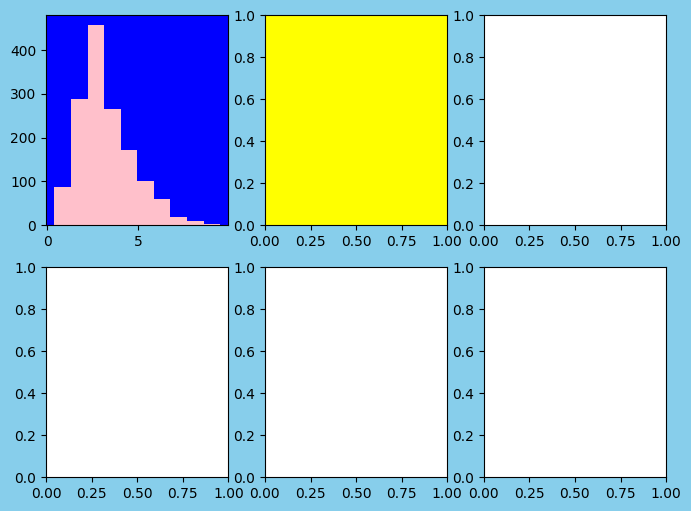

In [197]:
fig, ax = plt.subplots(2,3, figsize = (8,6))
fig.set_facecolor('skyblue')
ax[0,0].set_facecolor('blue')
ax[0,1].set_facecolor('yellow')
ax[0,0].hist(df_seattle_weather.WIND_METERS_PER_SEC, color = 'pink')
fig.get_dpi()  # by default is 100 dpi, higher the better

(array([ 87., 289., 456., 265., 172., 102.,  60.,  18.,   9.,   3.]),
 array([0.4 , 1.31, 2.22, 3.13, 4.04, 4.95, 5.86, 6.77, 7.68, 8.59, 9.5 ]),
 <BarContainer object of 10 artists>)

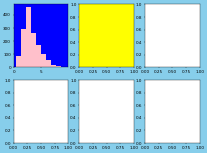

In [199]:
fig, ax = plt.subplots(2,3, figsize = (8,6))

fig.set_dpi(30)
fig.set_facecolor('skyblue')
ax[0,0].set_facecolor('blue')
ax[0,1].set_facecolor('yellow')
ax[0,0].hist(df_seattle_weather.WIND_METERS_PER_SEC, color = 'pink')

(array([ 87., 289., 456., 265., 172., 102.,  60.,  18.,   9.,   3.]),
 array([0.4 , 1.31, 2.22, 3.13, 4.04, 4.95, 5.86, 6.77, 7.68, 8.59, 9.5 ]),
 <BarContainer object of 10 artists>)

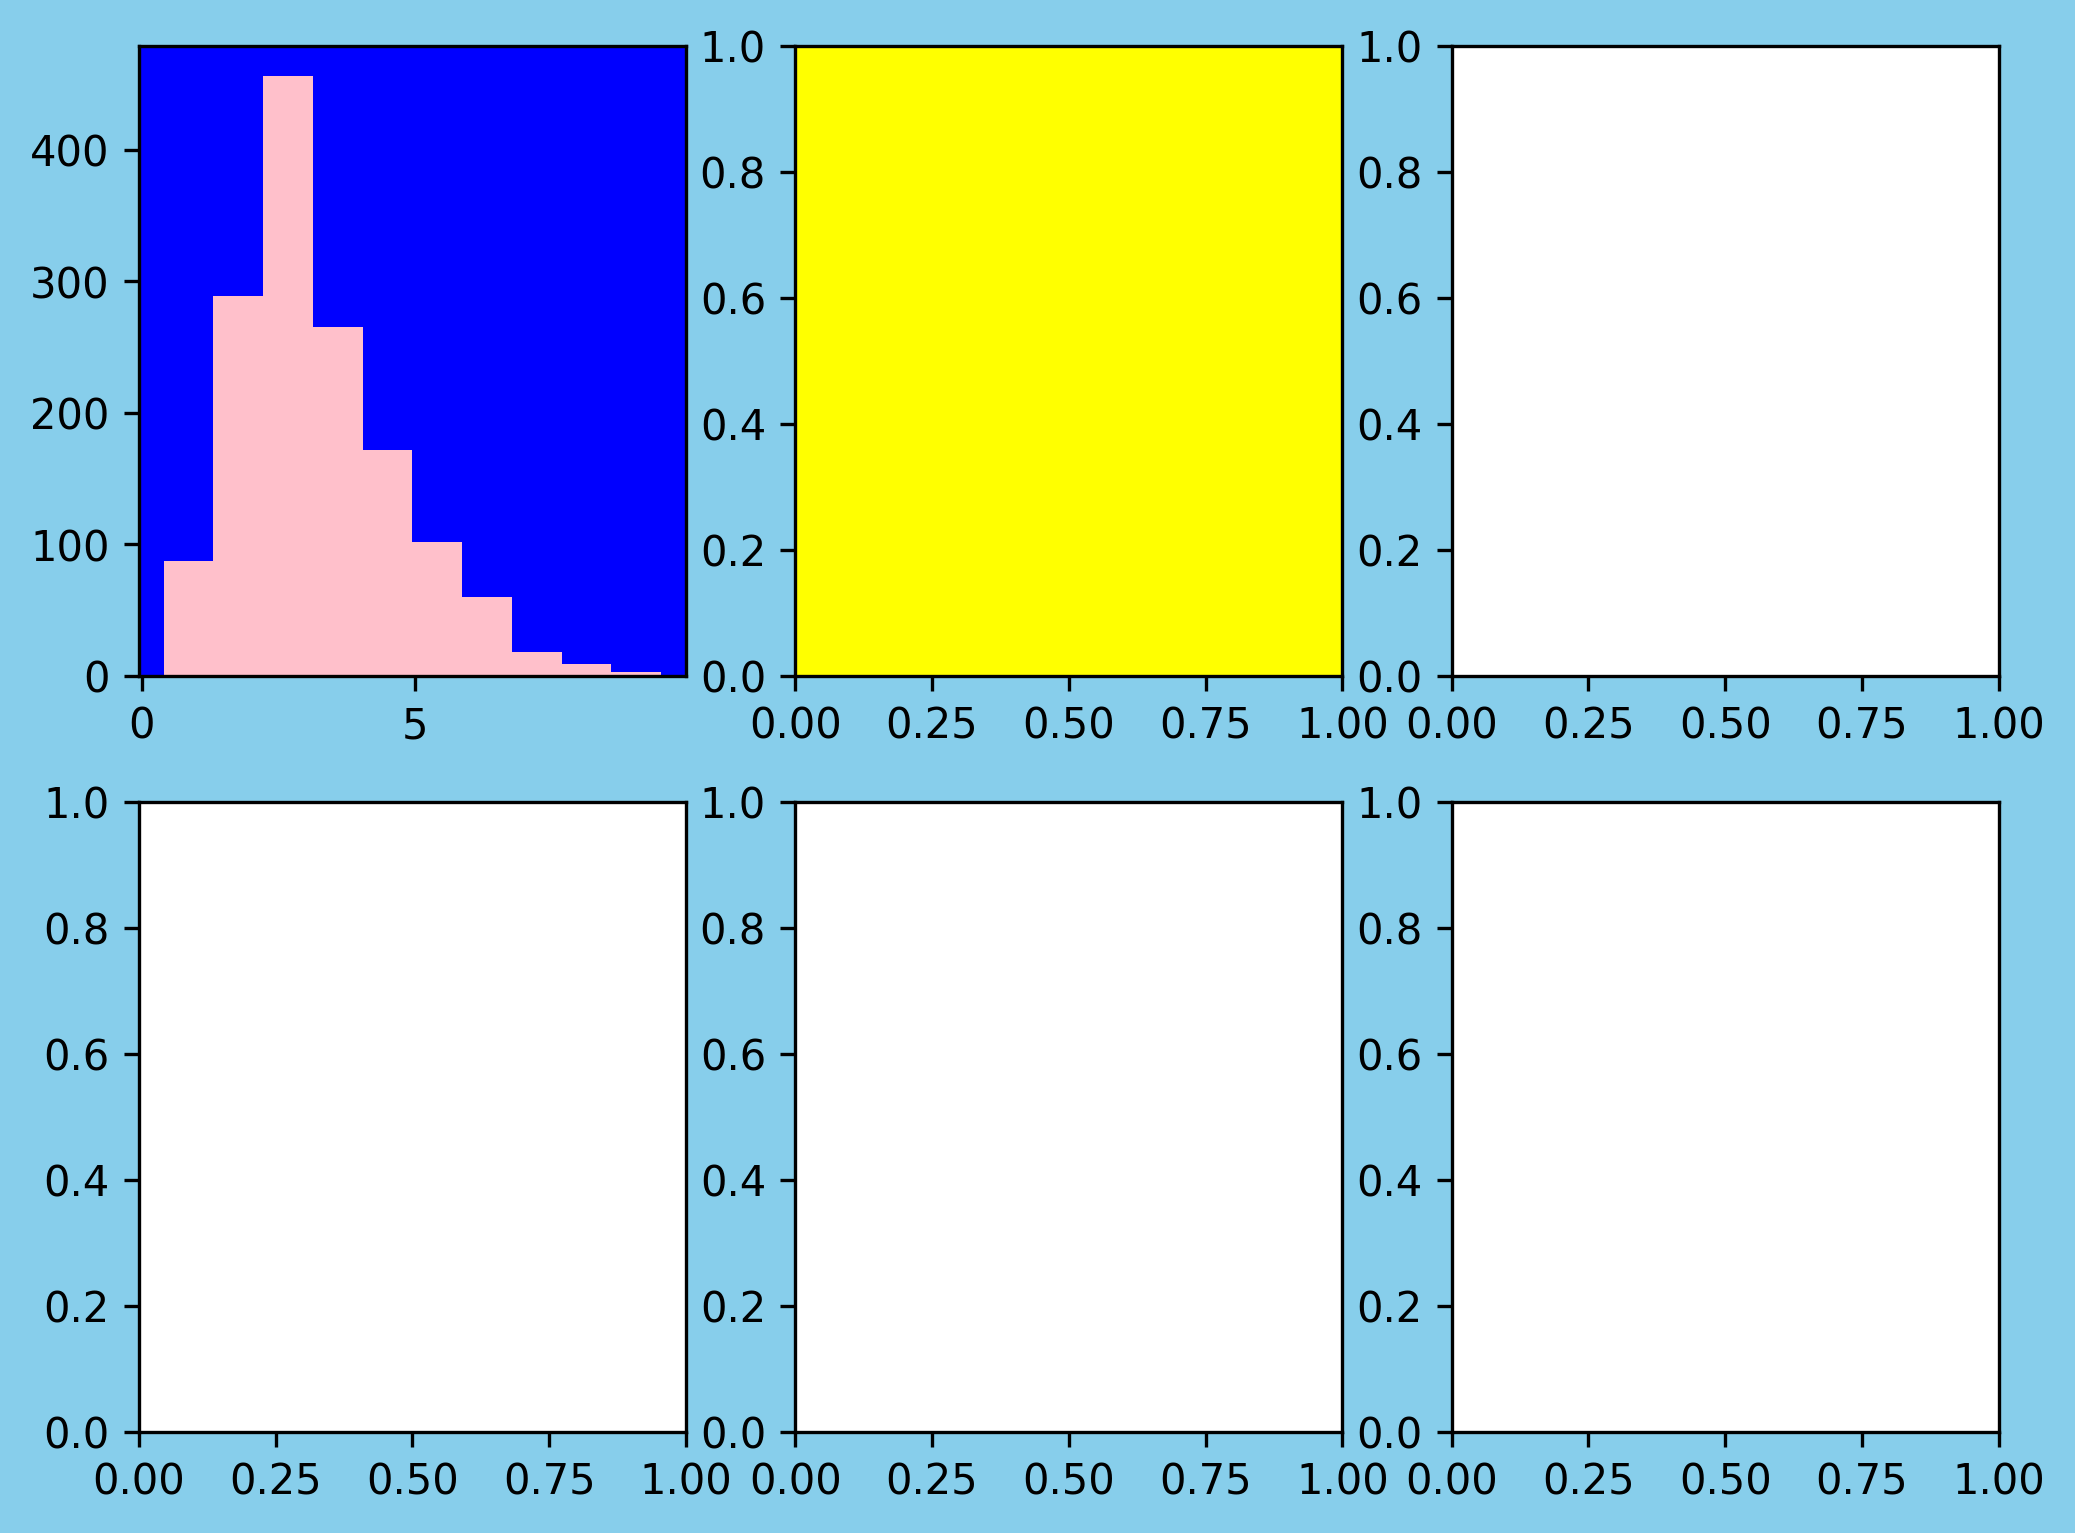

In [201]:
fig, ax = plt.subplots(2,3, figsize = (8,6))

fig.set_dpi(300)
fig.set_facecolor('skyblue')
ax[0,0].set_facecolor('blue')
ax[0,1].set_facecolor('yellow')
ax[0,0].hist(df_seattle_weather.WIND_METERS_PER_SEC, color = 'pink')

# Submit graphs in report with dpi between 200 and 400

# saving graphs
# once done plotting, use 
## `fig.savefig(filename.extension, bunch_of_arguments, dpi = ?)`

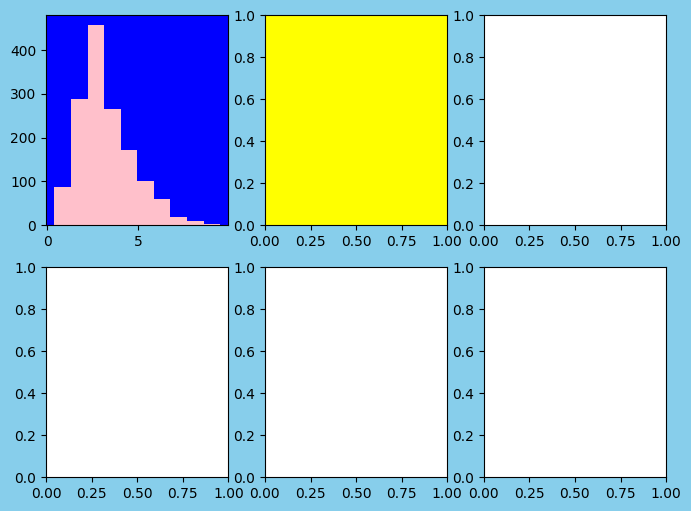

In [214]:
fig, ax = plt.subplots(2,3, figsize = (8,6))
fig.set_facecolor('skyblue')
ax[0,0].set_facecolor('blue')
ax[0,1].set_facecolor('yellow')
ax[0,0].hist(df_seattle_weather.WIND_METERS_PER_SEC, color = 'pink')
#save a file
fig.savefig('graph1.jpg', dpi = 200)
fig.savefig('graph2.pdf', dpi = 400)

# common mistake: no extension (.jpg, .pdf, etc.)

# most common graphs
# line, histogram, bar, barh, boxplot

# `bar` and **EVIL** `pie` plot
## pie is not good

<BarContainer object of 5 artists>

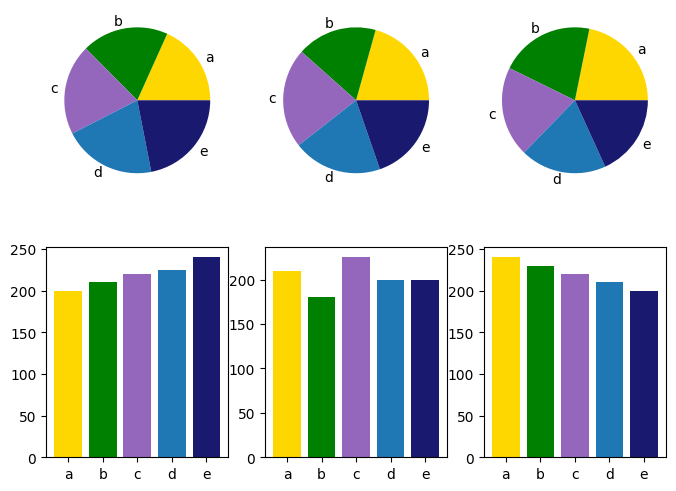

In [231]:
# example 1
fig, ax = plt.subplots(2,3, figsize= (8,6))
ax[0,0].pie(nums_1, labels = my_labels, colors = my_colors)
ax[0,1].pie(nums_2, labels = my_labels, colors = my_colors)
ax[0,2].pie(nums_3, labels = my_labels, colors = my_colors)

ax[1,0].bar(my_labels, nums_1, color = my_colors)
ax[1,1].bar(my_labels, nums_2, color = my_colors)
ax[1,2].bar(my_labels, nums_3, color = my_colors)

# boxplot, histogram, and violinplot
## boxplot: visualizing min, max, Q1, Q2, Q3, and outliners
## hist: shwoing distribution of data
## violinplot = boxplot + hist

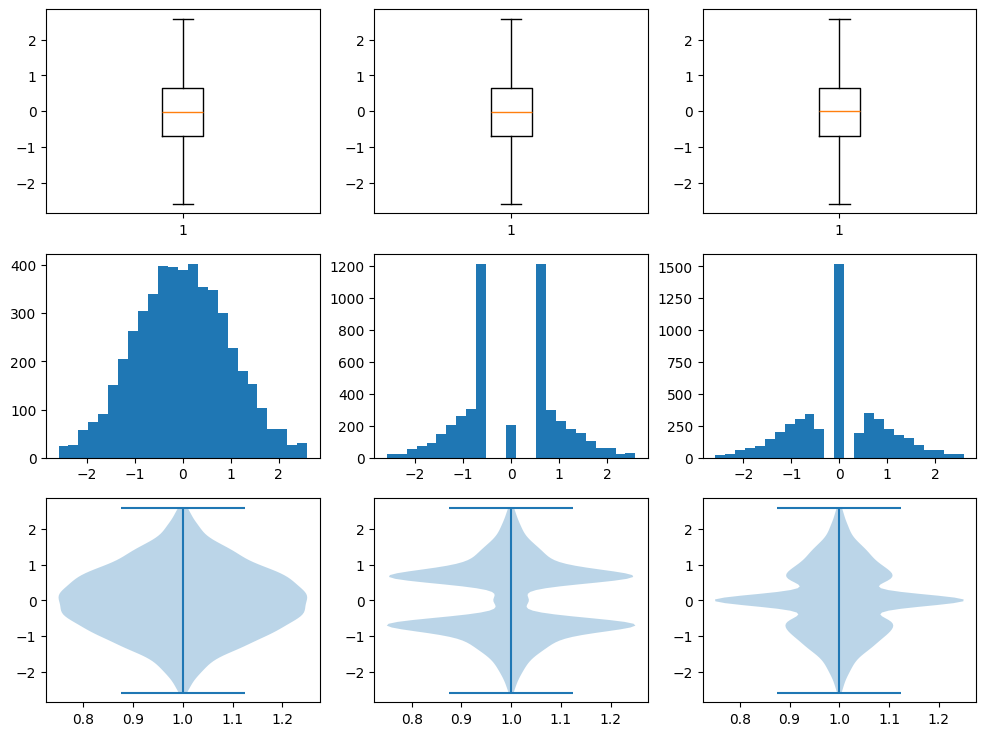

In [248]:
fig, ax = plt.subplots(3,3, figsize = (12,9))

ax[0,0].boxplot(df_box_1)
ax[0,1].boxplot(df_box_2)
ax[0,2].boxplot(df_box_3)

ax[1,0].hist(df_box_1, bins = 25)
ax[1,1].hist(df_box_2, bins = 25)
ax[1,2].hist(df_box_3, bins = 25)

ax[2,0].violinplot(df_box_1)
ax[2,1].violinplot(df_box_2)
ax[2,2].violinplot(df_box_3);



# The blue curve is called `kde`: `kernel density estimation`
# That is a continuous estimation of the histogram
### `KDE` and its estimation is NOT in final

# `scatterplot` for discovering relationships
# later: `heatmap` for visualizing relationships

In [255]:
# example
df_car_clean.head()

,EPA_FUEL_EFFICIENCY_ID,RELEASE_DATE,MODEL,MNFG_NAME,DIVISION,CARLINE,N_CYL,CITY_MPG,HWY_MPG,GUZZLER_STATUS,TRANSMISSION_TYPE,N_GEAR,DRIVE_SYS,DRIVE_DESCRIPTION,FUEL_USAGE,ANNUAL_FUEL_COST,CARLINE_CLASSIC_DESCRIPTION,AUTOMATIC_START_STOP,FUEL_EFFICIENCY_RATING,MNFG_SMOG_RATING
0,31638,2022-06-29,2023,aston martin,Aston Martin Lagonda Ltd,V12 Vantage,12,14,22,Yes,Automatic,8,R,"2-Wheel Drive, Rear",Gasoline (Premium Recommended),3400,Two Seaters,No,3,3
1,31279,2022-04-29,2023,aston martin,Aston Martin Lagonda Ltd,Vantage V8,8,18,24,No,Automatic,8,R,"2-Wheel Drive, Rear",Gasoline (Premium Recommended),2750,Two Seaters,No,4,5
2,31291,2022-07-29,2023,Volkswagen Group of,Audi,R8 Coupe quattro,10,13,18,Yes,Automated Manual,7,A,All Wheel Drive,Gasoline (Premium Required),3650,Two Seaters,No,2,1
3,31302,2022-07-29,2023,Volkswagen Group of,Audi,R8 Coupe RWD,10,14,23,Yes,Automated Manual,7,R,"2-Wheel Drive, Rear",Gasoline (Premium Required),3200,Two Seaters,No,3,1
4,32283,2022-10-21,2023,Volkswagen Group of,Audi,R8 GT RWD,10,14,21,Yes,Automated Manual,7,R,"2-Wheel Drive, Rear",Gasoline (Premium Required),3200,Two Seaters,No,3,1


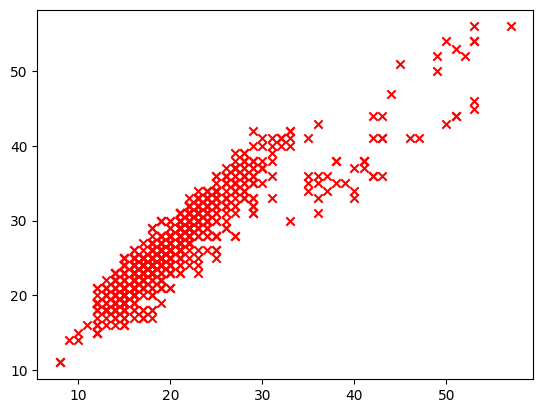

In [267]:
# visualize relationship between CITY_MPG and HWY_MPG
fig, ax = plt.subplots()

ax.scatter(df_car_clean.CITY_MPG,
          df_car_clean.HWY_MPG,
          color = 'red',
          marker = 'x')

# `seaborn`
## it's a low code visualization library.
## there're 3 common and very practical features of `seaborn`
## it 100% relies on `matplotlib`

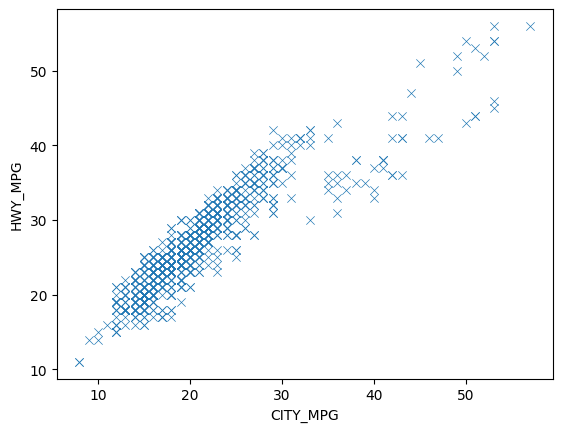

In [274]:
# hue: visual groupby
import seaborn as sns
sns.scatterplot(data = df_car_clean,
               x = 'CITY_MPG',
               y = 'HWY_MPG',
               marker = 'x');

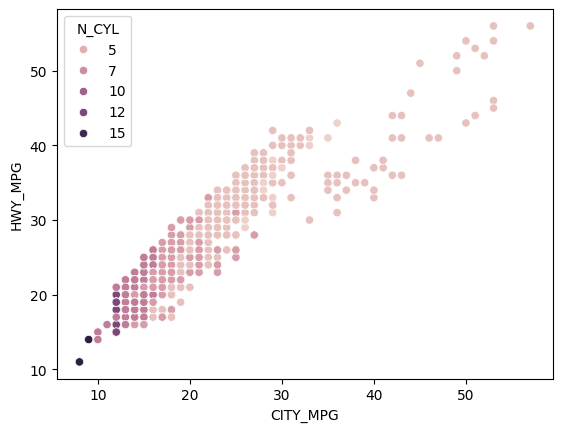

In [276]:
# hue: visual groupby
import seaborn as sns
sns.scatterplot(data = df_car_clean,
               x = 'CITY_MPG',
               y = 'HWY_MPG',
               hue = 'N_CYL');

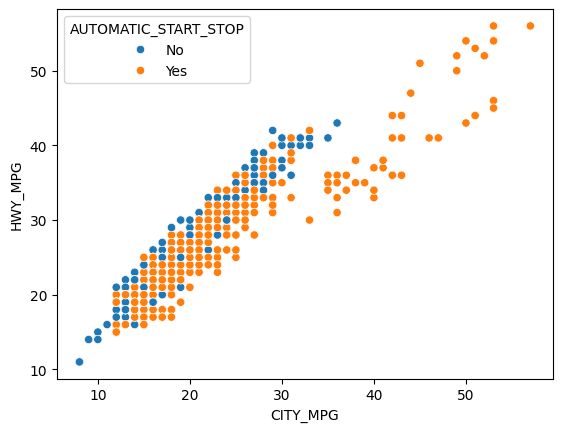

In [278]:
sns.scatterplot(data = df_car_clean,
               x = 'CITY_MPG',
               y = 'HWY_MPG',
               hue = 'AUTOMATIC_START_STOP');

# `pairplot` in seaborn

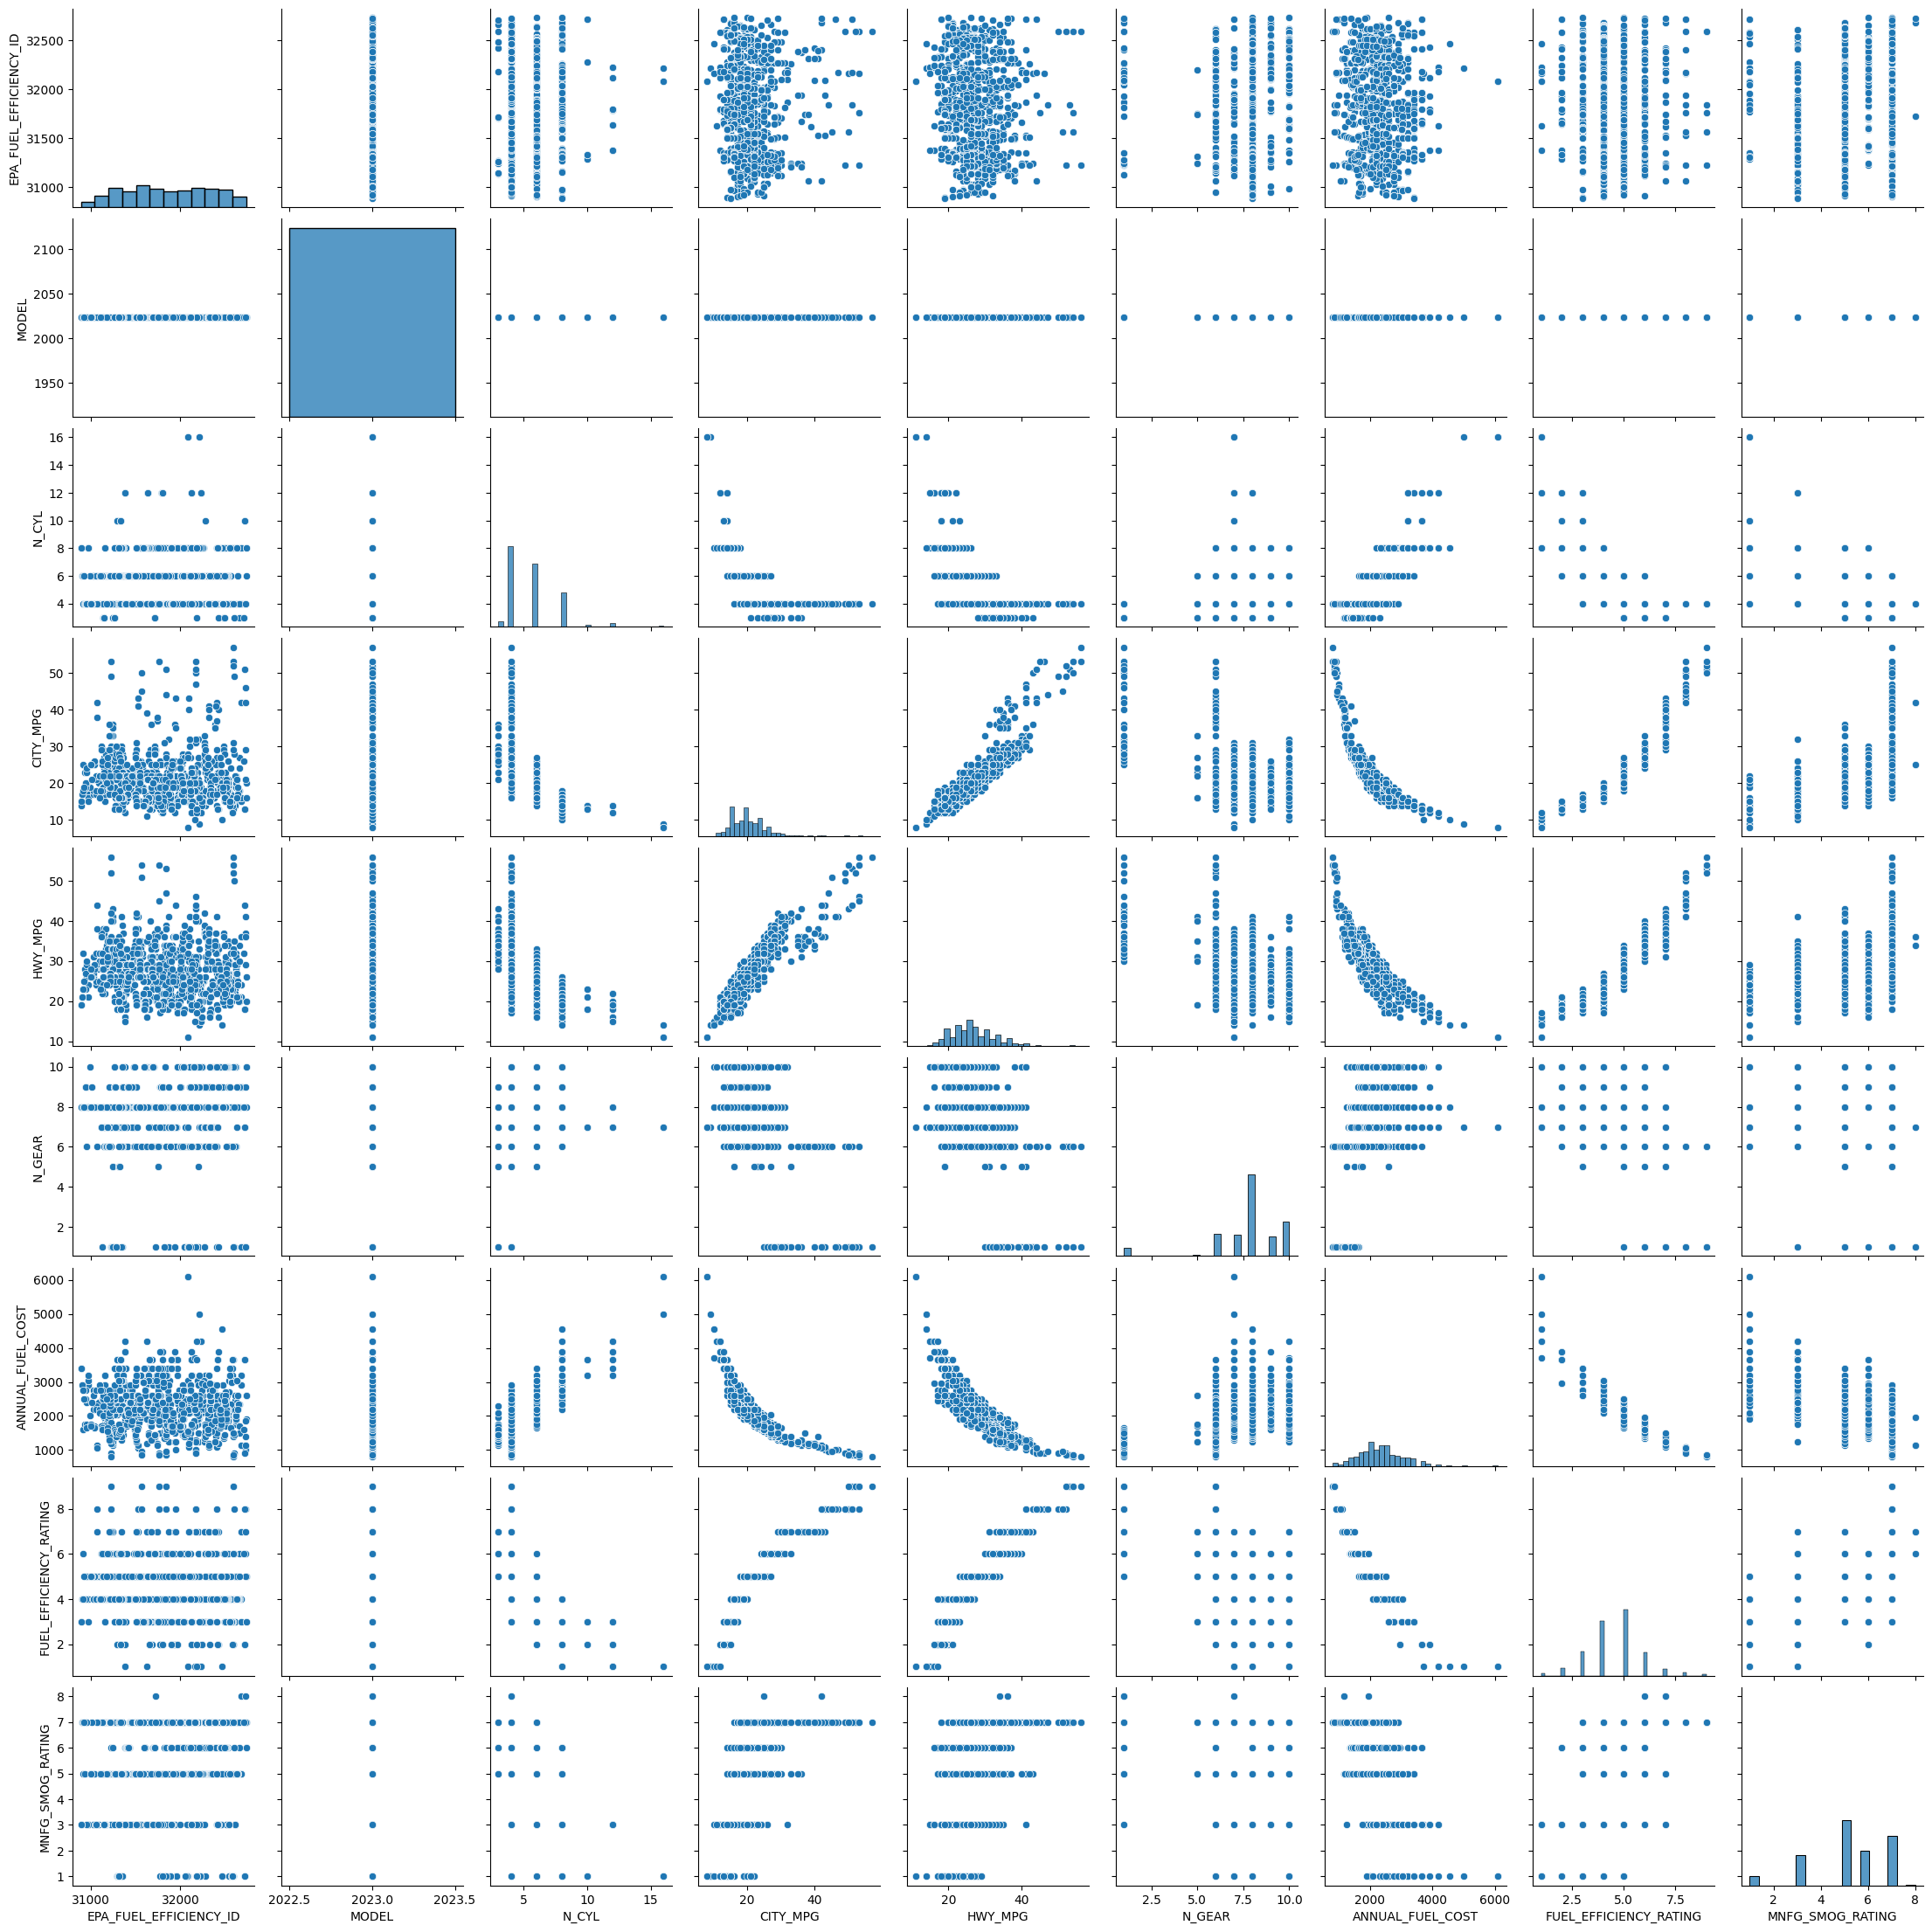

In [283]:
# pairplot is amazing for EDA
sns.pairplot(df_car_clean)

In [ ]:
# on main diagonal it has histograms and off diagonal it has scatter plots.
# great for exploring relationships
